In [163]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv

# Image manipulation library
from PIL import Image

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

# http://scikit-learn.org/stable/tutorial/machine_learning_map/

In [164]:
# Load datasets and store in ndarray
raw_train = genfromtxt('usps-4-9-train.csv', delimiter=',')
raw_test = genfromtxt('usps-4-9-test.csv', delimiter=',')

In [165]:
print raw_train[:,256][np.newaxis].T

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


In [166]:
# Split off known target values
y_train = raw_train[:,256]
y_test = raw_test[:,256]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 256 from X
raw_train = np.delete(raw_train, 256, axis=1)
raw_test = np.delete(raw_test, 256, axis=1)

## NOT COMPLETELY SURE WE NEED DUMMY ONES

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
   temp = np.ones(len(target))
   return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(raw_train)
dummy_test = make_dummy_vector(raw_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, raw_train), axis=1)
X_test = np.concatenate((dummy_test, raw_test), axis=1)


# In case we don't need dummy ones
#X_train = raw_train
#X_test = raw_test

In [167]:
# Data for a single sample
print raw_train[0]

[   0.    0.    0.    0.    0.    0.    0.    0.   11.  133.  195.    7.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.  120.
  220.  255.  149.    2.    0.    0.    0.    0.    0.    0.    0.   20.
  113.  172.  239.  255.  255.   72.    0.    0.    0.    0.    0.    0.
    0.    0.  122.  255.  253.  174.  105.  155.  255.    3.    0.    0.
    0.    0.    0.    0.    0.   73.  243.  183.   17.    0.    0.  144.
  244.    2.    0.    0.    0.    0.   30.   28.    0.    0.    0.    0.
    0.    0.    0.   98.  201.    0.    0.   15.  102.  179.  255.  174.
    0.    0.    0.    0.    0.    0.    0.  155.  212.   90.  167.  253.
  255.  206.   94.   16.    0.    0.    0.    0.    0.    0.   25.  223.
  255.  239.  139.   64.   43.    0.    0.    0.    0.    0.    0.    0.
   37.  154.  251.  255.  166.   12.    0.    0.    0.    0.    0.    0.
    0.   22.  116.  205.  252.  173.   97.  255.  109.    0.    0.    0.
    0.    0.    0.    0.   90.  248.  198.   93.   

In [168]:
## This is not completely working, we need to figure out why the image seems upside down ##

# Displays a single sample for context
def visualize_sample(data,target):
    temp = np.reshape(data[target],(16,16))
    img = Image.fromarray(temp)
    img.show()
    
# Example call to function
visualize_sample(raw_train, 1200)

In [169]:
# NOT YET NEEDED, INCORRECT FIRST ATTEMPT AT ASSIGNMENT

# Compute optimal weight vector w = (X^T * X)^-1 (X^T * Y)
# def calc_w_vector(X, y):
#     return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

# w_train = calc_w_vector(X_train,y_train)
# w_test = calc_w_vector(X_test,y_test)

# Computer linear regression function
# target_function_train = np.dot(X_test,w_test)
# target_function_test = np.dot(X_test,w_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_train)
# fig.suptitle('Linear Regression Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_test)
# fig.suptitle('Linear Regression Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# sigmoid_train = calc_sigmoid(target_function_train)
# sigmoid_test = calc_sigmoid(target_function_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_train)
# fig.suptitle('Sigmoid Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_test)
# fig.suptitle('Sigmoid Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

In [170]:
# Calculate sigmoid function
def calc_sigmoid(target_function):
    return (1 / (1 + np.exp(-target_function)))

In [171]:
print len(np.arange(0,5,0.5))

10


In [172]:
## Part 1
w_vectors = []
learning_rates = np.arange(0.0001,1.05,0.05) # 10 values between 0 and 5

# def batch_learning(X,y,n,lrn_rate,iterations=1):
#     w_batch = np.zeros(len(X[0]))
#     ## Repeat until convergence  
#     ctr = 0
#     for i in range(iterations):
#         d = np.zeros(len(X[0]))
#         #Range argument limits batch size
#         while(ctr < 1400):
#             print ctr
#             for i in range(n):
#                 y_hat_i = calc_sigmoid((np.dot(w_batch.T,X[ctr])))
#                 error = y[i] - y_hat_i
#                 d = np.add(d,error * X[i])
#                 ctr += 1
#             w_batch = np.add(w_batch,lrn_rate * d) 
#     return w_batch

def batch_learning(X, y, n, lrn_rate, iterations = 1):
    length = len(X[0])
    w_batch = np.zeros(length)
    for i in range(iterations):
        d = np.zeros(length)
        for j in range(n):
            y_hat_i = calc_sigmoid((np.dot(w_batch.T, X[j])))
            error = y[j] - y_hat_i
            d = np.add(d, error * X[j])
        w_batch = np.add(w_batch, lrn_rate * d)
    return w_batch

for i in learning_rates:
    w_vectors.append(batch_learning(X_train,y_train,200,i,16))

# print w_vectors
## Consider experimenting with alternate convergence conditions
# - Cease to change in objective value
# - norm of the gradient within a threshold

D:\Development\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


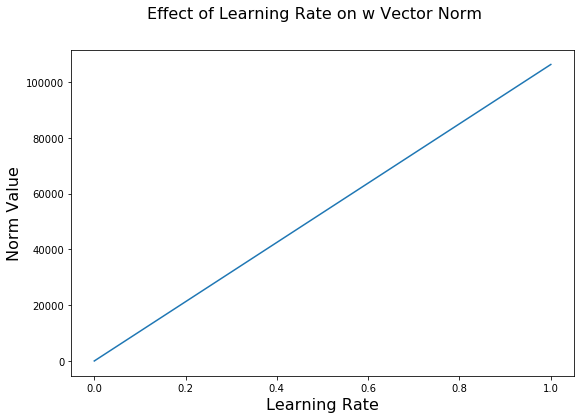

In [173]:
norms = []

for i in range(len(w_vectors)):
    norms.append(np.linalg.norm(w_vectors[i]))

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(learning_rates,norms)
fig.suptitle('Effect of Learning Rate on w Vector Norm', fontsize=16)
plt.xlabel('Learning Rate', fontsize=16)
plt.ylabel('Norm Value', fontsize=16)

In [174]:
print learning_rates

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]


In [175]:
print w_vectors[0]

[-0.01  -0.007 -0.033 -0.052 -0.083 -0.139 -0.275 -0.446 -0.572 -0.494
 -0.235 -0.142 -0.051 -0.026 -0.028 -0.134 -0.155 -0.024 -0.101 -0.199
 -0.39  -0.66  -1.035 -1.33  -1.444 -1.224 -0.668 -0.344 -0.141 -0.099
 -0.232 -0.353 -0.196 -0.038 -0.141 -0.361 -0.644 -0.967 -1.292 -1.494
 -1.507 -1.249 -0.741 -0.37  -0.214 -0.308 -0.401 -0.368 -0.175 -0.049
 -0.279 -0.49  -0.747 -0.949 -1.092 -1.173 -1.217 -1.137 -0.742 -0.441
 -0.424 -0.448 -0.436 -0.381 -0.206 -0.115 -0.356 -0.583 -0.744 -0.845
 -0.769 -0.793 -1.036 -1.046 -0.806 -0.65  -0.569 -0.513 -0.471 -0.512
 -0.289 -0.123 -0.35  -0.588 -0.674 -0.559 -0.459 -0.582 -0.884 -1.064
 -0.994 -0.836 -0.67  -0.575 -0.612 -0.565 -0.283 -0.129 -0.353 -0.479
 -0.421 -0.302 -0.288 -0.509 -0.851 -1.181 -1.218 -0.941 -0.743 -0.696
 -0.61  -0.493 -0.233 -0.105 -0.279 -0.274 -0.23  -0.168 -0.217 -0.561
 -1.005 -1.364 -1.321 -1.015 -0.829 -0.646 -0.535 -0.425 -0.186 -0.119
 -0.242 -0.205 -0.151 -0.171 -0.376 -0.834 -1.251 -1.414 -1.302 -1.001
 -0.72

In [ ]:
## Part 4

def func_calc_reg(X, y, w, lamda):
    fst = 0
    for i in range(len(w)):
        g = calc_sigmoid((np.dot(w[i].T, X[i])))
        if y[i] == 1: fst += (-np.log10(g))        
        if y[i] == 0: fst += (-np.log10(1 - g))
            
    snd = (lamda * np.linalg.norm(w, 2) ** 2) / 2
    return np.add(fst, snd)

lambdas, norms = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000], []

for w_vector in w_vectors:
    norms.append(np.linalg.norm(w_vector))
    for lamda in lambdas:
        value = func_calc_reg(X_train, y_train, w_vector, lamda)
#         print value

In [ ]:
norms = []

for i in range(len(w_vectors)):
    norms.append(np.linalg.norm(w_vectors[i]))

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(learning_rates,norms)
fig.suptitle('Effect of Learning Rate on w Vector Norm', fontsize=16)
plt.xlabel('Learning Rate', fontsize=16)
plt.ylabel('Norm Value', fontsize=16)

In [ ]:
# Experimenting with different learing values

## Thought: Maybe we can use the norm to quantify the effect of the learning rate on our w vector
